# James Camagong's DJ Set Analysis - Data Prep and Analysis
This notebook explains how I prepped and analyzed the data from Spotify and 1001tracklists.com (previous notebook - https://github.com/jamescamagong/DJ-set-analysis/blob/master/DJ%20Set%20Analysis%20Data%20Pull%20and%20Preparation.ipynb). See the article for the full writeup - https://medium.com/@jcamagong/data-science-for-djing-b4c7a422c197?sk=ddbd30c78e56d3d15a90837c2622d988

## Data cleaning and preparation:

Import the .csv of data from the last part of the project:

In [195]:
import pandas as pd


df = pd.read_csv('/Users/JC/Downloads/dffull.csv')

# clean up some column values
df['artist'] = df['artist'].apply(str.title)
df['artist'] = df['artist'].apply(lambda x: x.replace('_', ' '))
df['artist'] = df['artist'].apply(lambda x: x.replace('Dj Snake', 'DJ Snake'))

df.head()

,position,tracklist,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveliness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.628,0.833,11,-4.126,0,0.0282,0.007900,...,0.074,0.5600,128.003,audio_features,2ISSQPb9LHHiV6ng2NXosL,spotify:track:2ISSQPb9LHHiV6ng2NXosL,https://api.spotify.com/v1/tracks/2ISSQPb9LHHi...,https://api.spotify.com/v1/audio-analysis/2ISS...,218293,4
1,2,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.553,0.872,6,-2.088,0,0.1370,0.085700,...,0.225,0.4920,127.964,audio_features,4ZR9C21EoHsO1kNw1m3KZ4,spotify:track:4ZR9C21EoHsO1kNw1m3KZ4,https://api.spotify.com/v1/tracks/4ZR9C21EoHsO...,https://api.spotify.com/v1/audio-analysis/4ZR9...,180907,4
2,3,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.825,0.655,6,-4.196,0,0.0968,0.002160,...,0.136,0.5090,128.000,audio_features,1zHP24nRJRnVi38qGVqmjO,spotify:track:1zHP24nRJRnVi38qGVqmjO,https://api.spotify.com/v1/tracks/1zHP24nRJRnV...,https://api.spotify.com/v1/audio-analysis/1zHP...,359867,4
3,6,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.688,0.887,7,-3.680,1,0.1580,0.000816,...,0.276,0.0399,126.029,audio_features,3G94lNH9BlS5a2WpfwJ1E6,spotify:track:3G94lNH9BlS5a2WpfwJ1E6,https://api.spotify.com/v1/tracks/3G94lNH9BlS5...,https://api.spotify.com/v1/audio-analysis/3G94...,196295,4
4,7,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.579,0.759,2,-5.584,0,0.0386,0.060000,...,0.117,0.1270,127.875,audio_features,0qlAureWHln3vDCsqnkyRE,spotify:track:0qlAureWHln3vDCsqnkyRE,https://api.spotify.com/v1/tracks/0qlAureWHln3...,https://api.spotify.com/v1/audio-analysis/0qlA...,296280,4


Calculate a `percent_complete` field as a way to represent time passing in the DJ set

In [197]:
num_tracks = df.groupby(['tracklist'])['position'].max().reset_index()
num_tracks.rename(columns={'position':'num_tracks'}, inplace=True)


df = df.merge(num_tracks, on='tracklist', how='left')

df['percent_complete'] = round(100*(df.position/df['num_tracks']),0)
df.head()

,position,tracklist,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,num_tracks,percent_complete
0,1,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.628,0.833,11,-4.126,0,0.0282,0.007900,...,128.003,audio_features,2ISSQPb9LHHiV6ng2NXosL,spotify:track:2ISSQPb9LHHiV6ng2NXosL,https://api.spotify.com/v1/tracks/2ISSQPb9LHHi...,https://api.spotify.com/v1/audio-analysis/2ISS...,218293,4,41,2.0
1,2,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.553,0.872,6,-2.088,0,0.1370,0.085700,...,127.964,audio_features,4ZR9C21EoHsO1kNw1m3KZ4,spotify:track:4ZR9C21EoHsO1kNw1m3KZ4,https://api.spotify.com/v1/tracks/4ZR9C21EoHsO...,https://api.spotify.com/v1/audio-analysis/4ZR9...,180907,4,41,5.0
2,3,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.825,0.655,6,-4.196,0,0.0968,0.002160,...,128.000,audio_features,1zHP24nRJRnVi38qGVqmjO,spotify:track:1zHP24nRJRnVi38qGVqmjO,https://api.spotify.com/v1/tracks/1zHP24nRJRnV...,https://api.spotify.com/v1/audio-analysis/1zHP...,359867,4,41,7.0
3,6,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.688,0.887,7,-3.680,1,0.1580,0.000816,...,126.029,audio_features,3G94lNH9BlS5a2WpfwJ1E6,spotify:track:3G94lNH9BlS5a2WpfwJ1E6,https://api.spotify.com/v1/tracks/3G94lNH9BlS5...,https://api.spotify.com/v1/audio-analysis/3G94...,196295,4,41,15.0
4,7,https://www.1001tracklists.com/tracklist/10u49...,Zedd,0.579,0.759,2,-5.584,0,0.0386,0.060000,...,127.875,audio_features,0qlAureWHln3vDCsqnkyRE,spotify:track:0qlAureWHln3vDCsqnkyRE,https://api.spotify.com/v1/tracks/0qlAureWHln3...,https://api.spotify.com/v1/audio-analysis/0qlA...,296280,4,41,17.0


This is kind of the Pandas equivalent of a SQL cross-join. I want to have each unique `tracklist` to have rows from 0-100 `percent_complete` to have equal mini-timeseries for each `tracklist`. This will allow for smoother and more understandble graphs later.

In [196]:
pct_complete = pd.DataFrame({'percent_complete':range(1,101)})
tracklists = pd.DataFrame({'tracklist':df.tracklist.unique()})
pct_complete['key'] = 0
tracklists['key'] = 0
pct_complete_full = pd.merge(pct_complete.assign(key=0), tracklists.assign(key=0), on='key').drop('key', axis=1)
pct_complete_full.head()

,percent_complete,tracklist
0,1,https://www.1001tracklists.com/tracklist/10u49...
1,1,https://www.1001tracklists.com/tracklist/10u8b...
2,1,https://www.1001tracklists.com/tracklist/13m94...
3,1,https://www.1001tracklists.com/tracklist/13muq...
4,1,https://www.1001tracklists.com/tracklist/14kp9...


Here we join the main dataframe to the df we made in the last step. Now we have 1 row for each percentage completed of each DJ set. We also forward fill the song and its other attributes for all rows in the new df.

In [199]:
df_full = pd.merge(pct_complete_full, df, how='left', on=['tracklist', 'percent_complete'])

df_full = df_full[['artist', 'tracklist', 'percent_complete', 'danceability','energy',
 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveliness','valence','tempo']]

df_full.sort_values(['tracklist', 'percent_complete'], inplace=True)

ffill_cols = ['artist', 'danceability','energy','key','loudness','mode','speechiness','acousticness',
              'instrumentalness','liveliness','valence','tempo']

# forward fill artist and the music features
for col in ffill_cols:
    df_full[col] = df_full.groupby(['tracklist'])[col].transform(lambda v: v.ffill())

df_full.head()

,artist,tracklist,percent_complete,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo
0,NaN,https://www.1001tracklists.com/tracklist/10u49...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Zedd,https://www.1001tracklists.com/tracklist/10u49...,2,0.628,0.833,11.0,-4.126,0.0,0.0282,0.0079,0.000015,0.074,0.560,128.003
157,Zedd,https://www.1001tracklists.com/tracklist/10u49...,3,0.628,0.833,11.0,-4.126,0.0,0.0282,0.0079,0.000015,0.074,0.560,128.003
235,Zedd,https://www.1001tracklists.com/tracklist/10u49...,4,0.628,0.833,11.0,-4.126,0.0,0.0282,0.0079,0.000015,0.074,0.560,128.003
313,Zedd,https://www.1001tracklists.com/tracklist/10u49...,5,0.553,0.872,6.0,-2.088,0.0,0.1370,0.0857,0.000004,0.225,0.492,127.964


Now we take the exponential moving average for all of the music features within each DJ set. This helps smooth out the data and helps us see overall trends, lessening the effect of a DJ's one-off song choice that is not in line with the overall audio features in a set.

In [200]:
# define a list of music features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveliness', 'valence', 'tempo']

for col in features:
    df_full[col] = df_full.groupby('tracklist')[col].transform(lambda x: x.ewm(span=10).mean())

## Analysis:

### Plotting progressions of music features throughout an average DJ set
With those transformations complete, we can now plot how the audio features of the DJs' song changes throughout an average set.

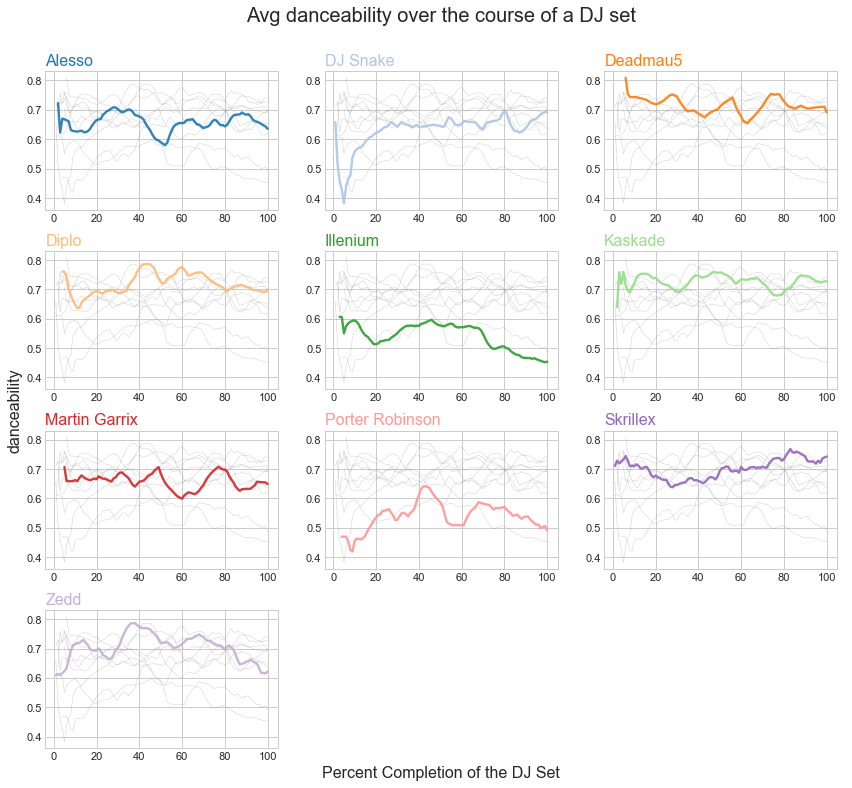

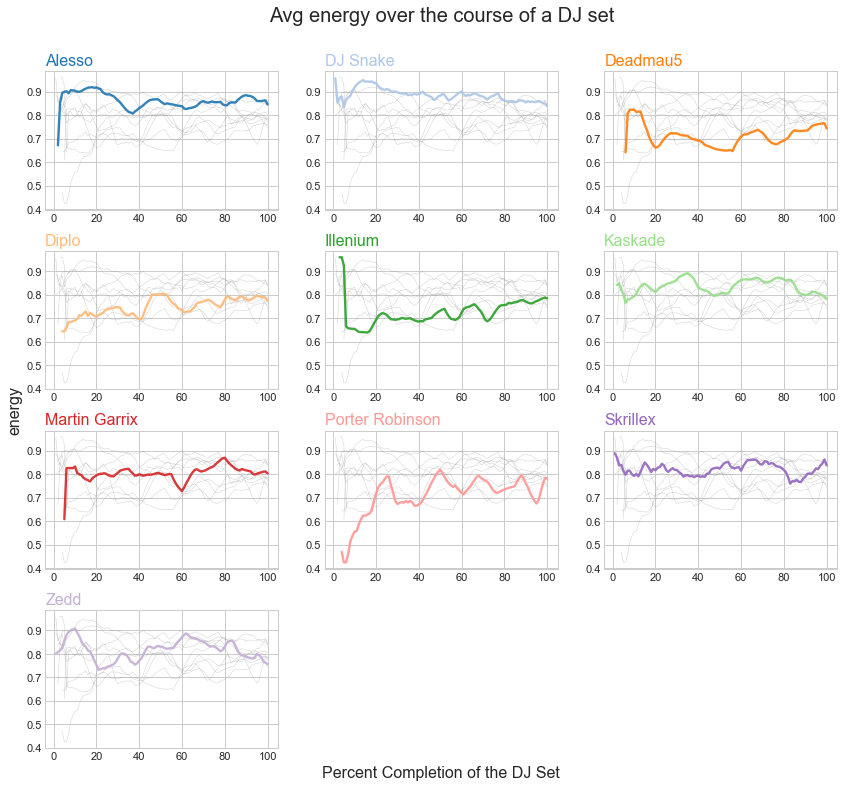

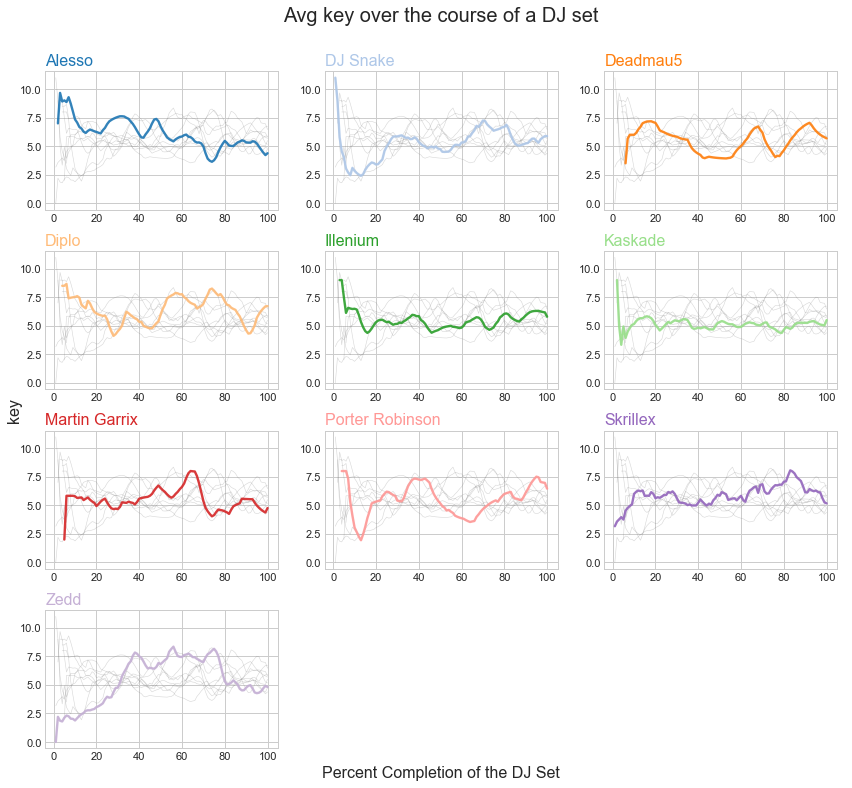

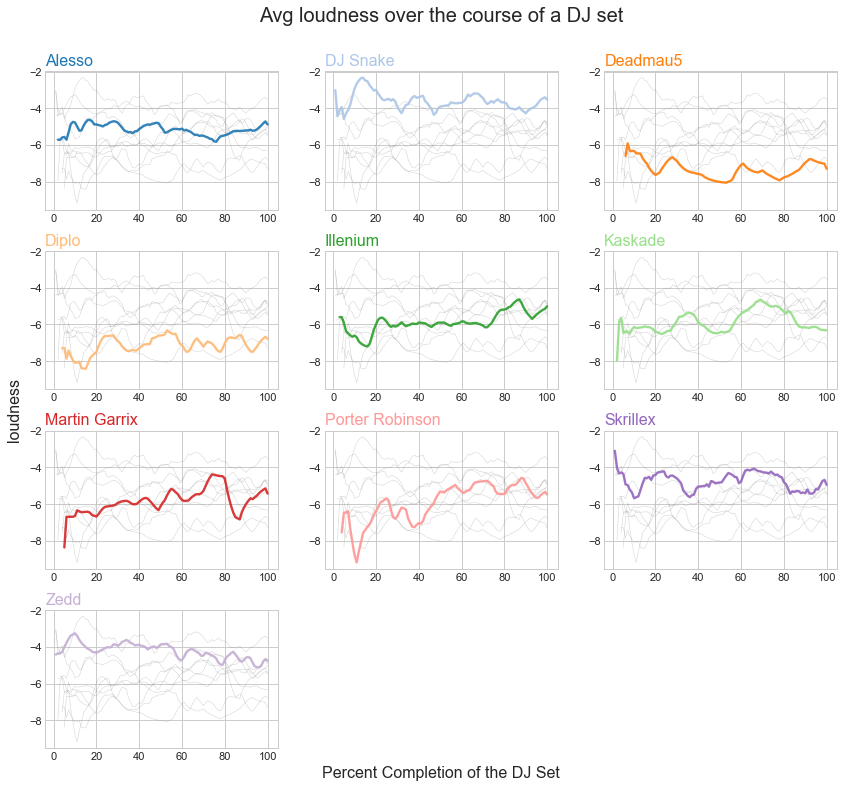

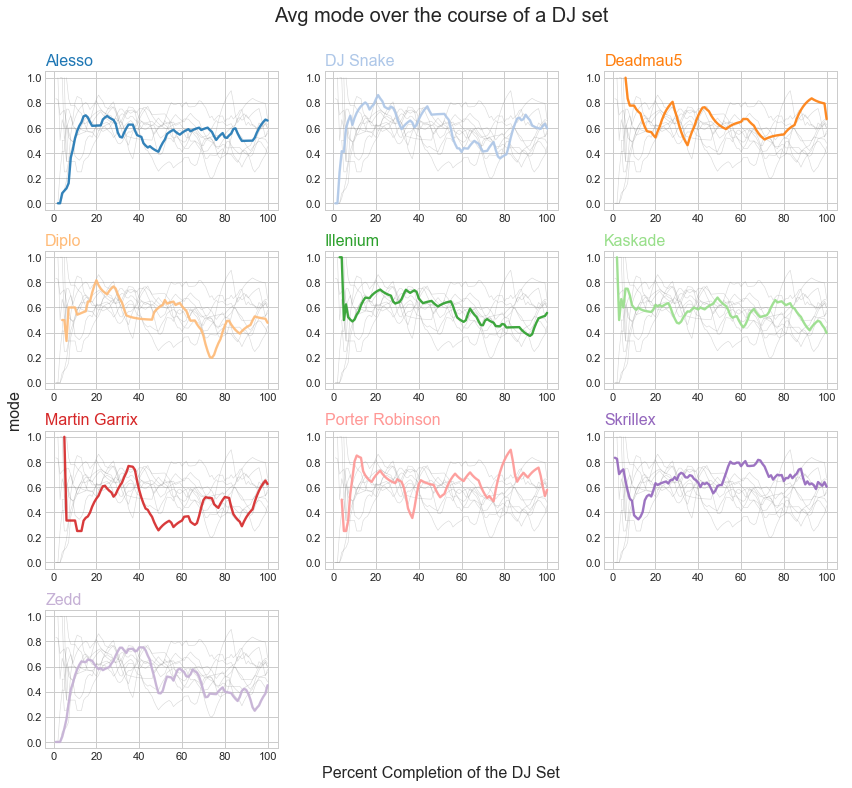

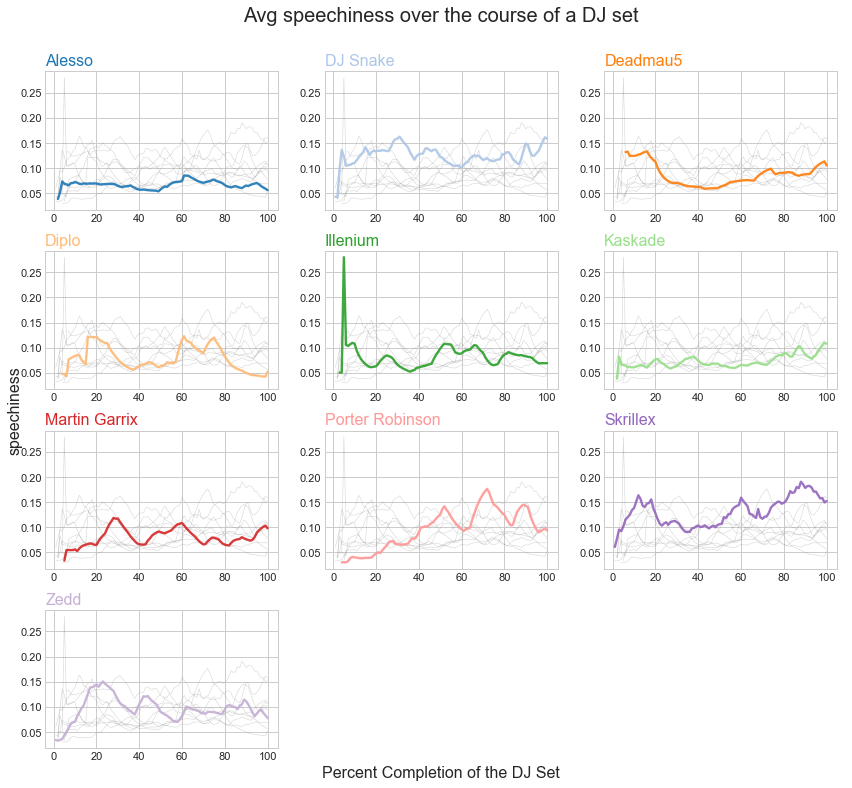

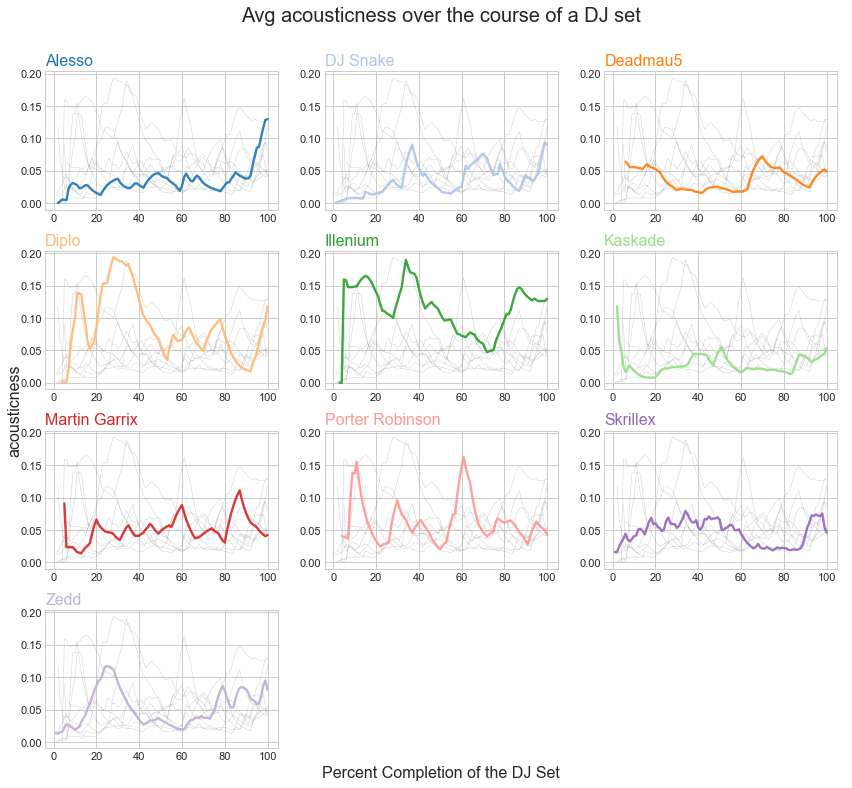

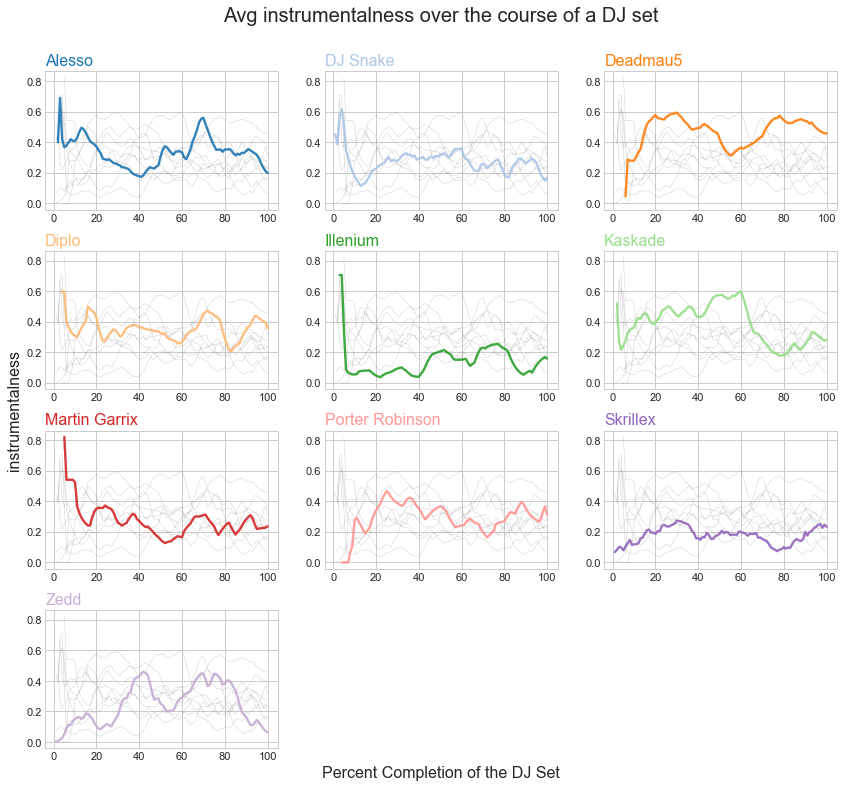

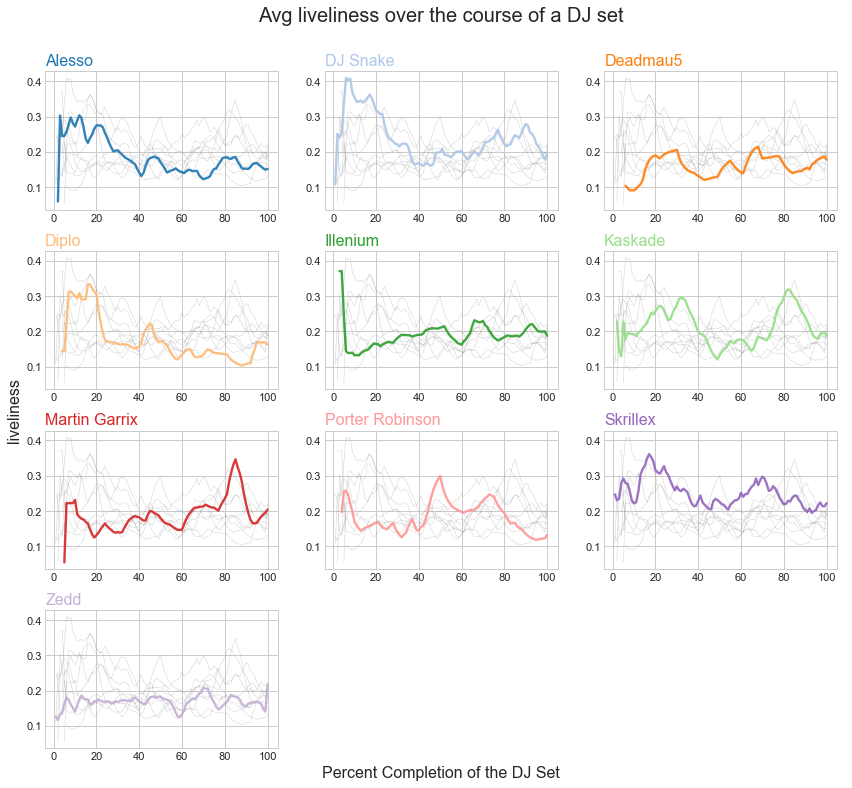

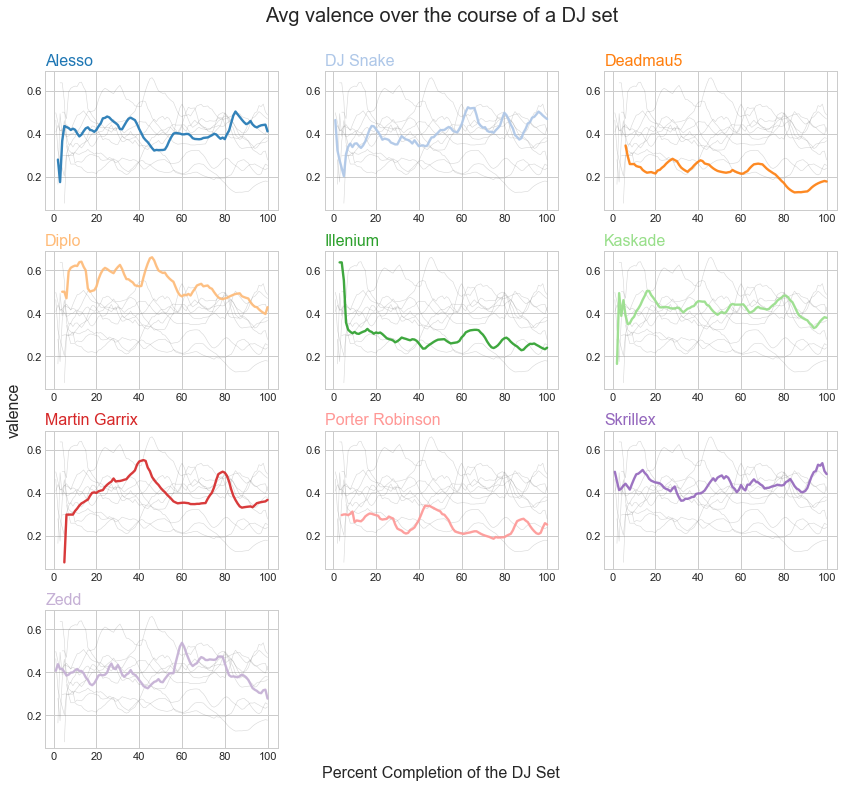

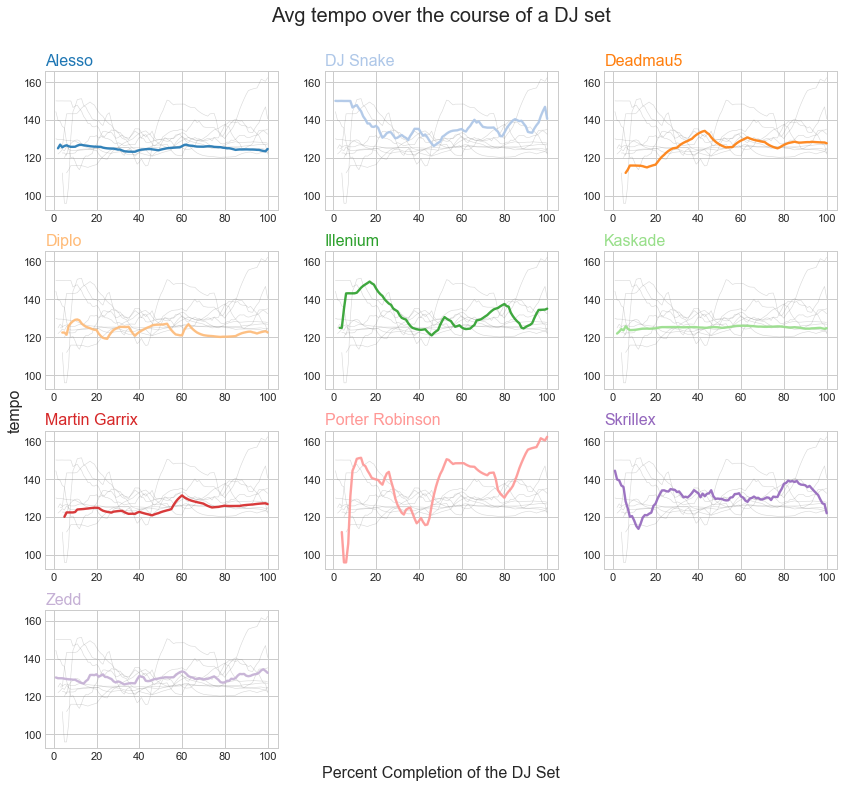

In [13]:
# Inspiration for this graph: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1)
plt.style.use('seaborn-whitegrid')

for feature in features:
    pivot = pd.pivot_table(df_full, values=feature, index=['percent_complete'], columns=['artist'], \
                                 aggfunc='mean')

    fig, axs = plt.subplots(4, 3, figsize=(10,10))
    fig.subplots_adjust(hspace=0.3)
    # # create a color palette
    palette = plt.get_cmap('tab20')

    # multiple line plot
    num=0
    for column in pivot:

        fig.subplots_adjust(top=1.05,bottom=-0.05,left=-0.05,right=1.05)
        ax = axs.flatten()
        # plot every groups, but discreet
        for v in pivot:
            ax[num].plot(pivot.index, pivot[v], marker='', color='grey', linewidth=0.6, alpha=0.3)

        # Plot the lineplot
        ax[num].plot(pivot.index, pivot[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)

        # Add title
        ax[num].set_title(column, loc='left', fontsize=16, fontweight=0, color=palette(num) )

        num+=1

    # remove empty charts
    fig.delaxes(axs[3][1])
    fig.delaxes(axs[3][2])

    fig.suptitle('Avg {} over the course of a DJ set'.format(feature), size=20)
    fig.subplots_adjust(top=0.89)

    # Adding figure level axis labels:
    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Percent Completion of the DJ Set', size=16)
    plt.ylabel(feature, size=16)
    
    # these plots do not make sense for key and mode but we plot them anyways for simplicity


### Calculating song-to-song changes in music features

Here we define a new columns for each music feature that calculates the difference in values from one song in a DJ set to the next. This data can provide guidelines for DJs on how to pick the next song.

In [201]:
for col in features:
  df['change in '+str(col)] = abs(df.sort_values(by=['position'], \
                                                 ascending=True).groupby(['tracklist'])[col].shift(0)
    - df.sort_values(by=['position'], ascending=True).groupby(['tracklist'])[col].shift(1))

Because of missing songs in the data, we make helper columns to flag when we have 2 songs played one right after the other.

In [204]:
import numpy as np


df['last_position'] = df.sort_values(by=['position'], ascending=True).groupby(['tracklist'])['position'].shift(1)
df['is_directly_after'] = np.where(df.last_position + 1 == df.position, True, False)

Creating a new df with only the columns we need

In [207]:
change_in_characteristics = df[(df['is_directly_after'] == True)]

change_in_characteristics = \
df[['artist', 'change in loudness', 'change in mode', 'change in speechiness', 'change in acousticness', \
    'change in instrumentalness', 'change in liveliness', 'change in key',\
'change in valence', 'change in tempo']]

Here we calculate the median song-to-song change in the music feature values for each DJ

In [210]:
df_median_changes = change_in_characteristics.groupby(['artist']).median()
df_median_changes

,change in loudness,change in mode,change in speechiness,change in acousticness,change in instrumentalness,change in liveliness,change in key,change in valence,change in tempo
artist,,,,,,,,,
Alesso,1.4640,0.0,0.01830,0.014260,0.315995,0.09500,3.0,0.1980,2.0140
DJ Snake,1.4080,0.0,0.07005,0.012100,0.282500,0.13315,3.0,0.1945,5.0450
Deadmau5,1.3600,0.0,0.02490,0.019235,0.260000,0.05610,3.0,0.1260,2.0835
Diplo,1.8500,0.0,0.02530,0.035820,0.218000,0.06010,4.0,0.2070,2.9740
Illenium,1.6420,0.0,0.02910,0.070500,0.008402,0.10800,4.0,0.1640,5.9820
Kaskade,1.5155,1.0,0.02735,0.016865,0.316631,0.11510,3.0,0.2445,2.0025
Martin Garrix,1.4870,0.0,0.03300,0.045300,0.172000,0.09300,3.0,0.1676,1.9240
Porter Robinson,2.0495,1.0,0.03945,0.016938,0.258000,0.05850,4.0,0.1170,23.4975
Skrillex,2.2570,0.0,0.09100,0.019610,0.041000,0.14800,5.0,0.1590,10.8970


Plotting changes in key:

Text(0, 0.5, 'change in key (pitch class integer)')

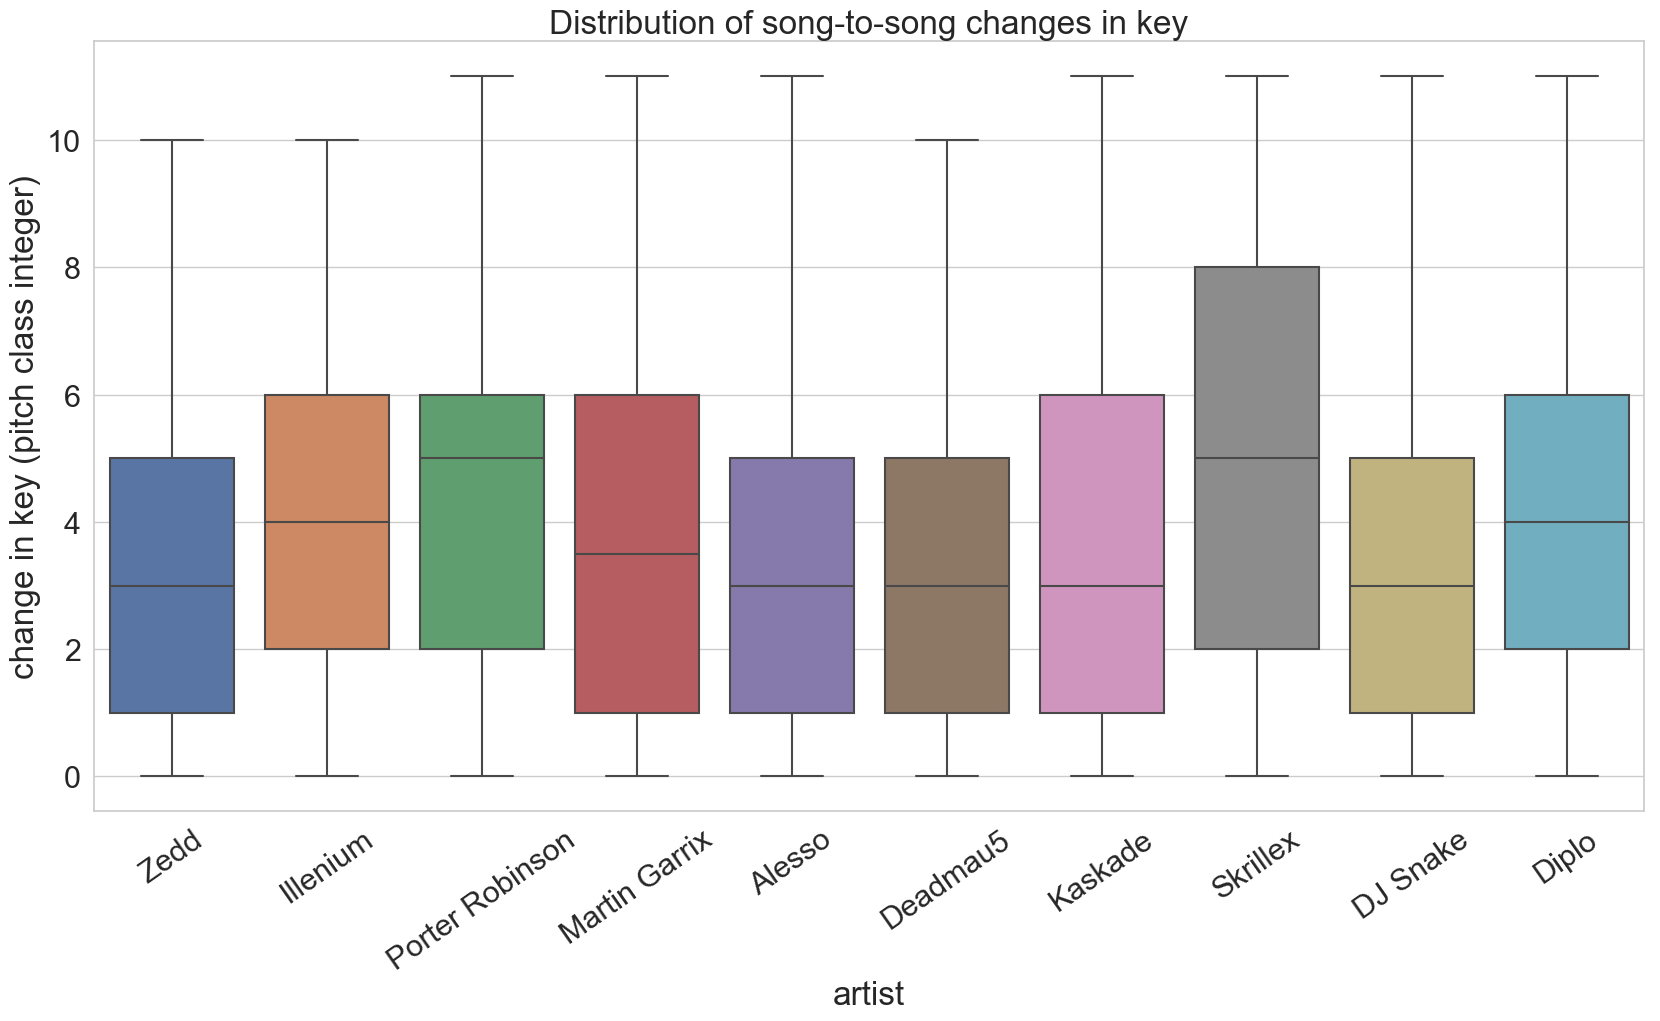

In [193]:
plt.xticks(rotation=35)
sns.set(rc={'figure.figsize':(10,20)}, font_scale = 2, style='whitegrid')
ax = sns.boxplot(x="artist", y="change in key", data=df_dj_avgs).set_title('Distribution of song-to-song changes in key')
plt.ylabel('change in key (pitch class integer)')

Plotting changes in tempo:

Text(0, 0.5, 'change in tempo (BPM)')

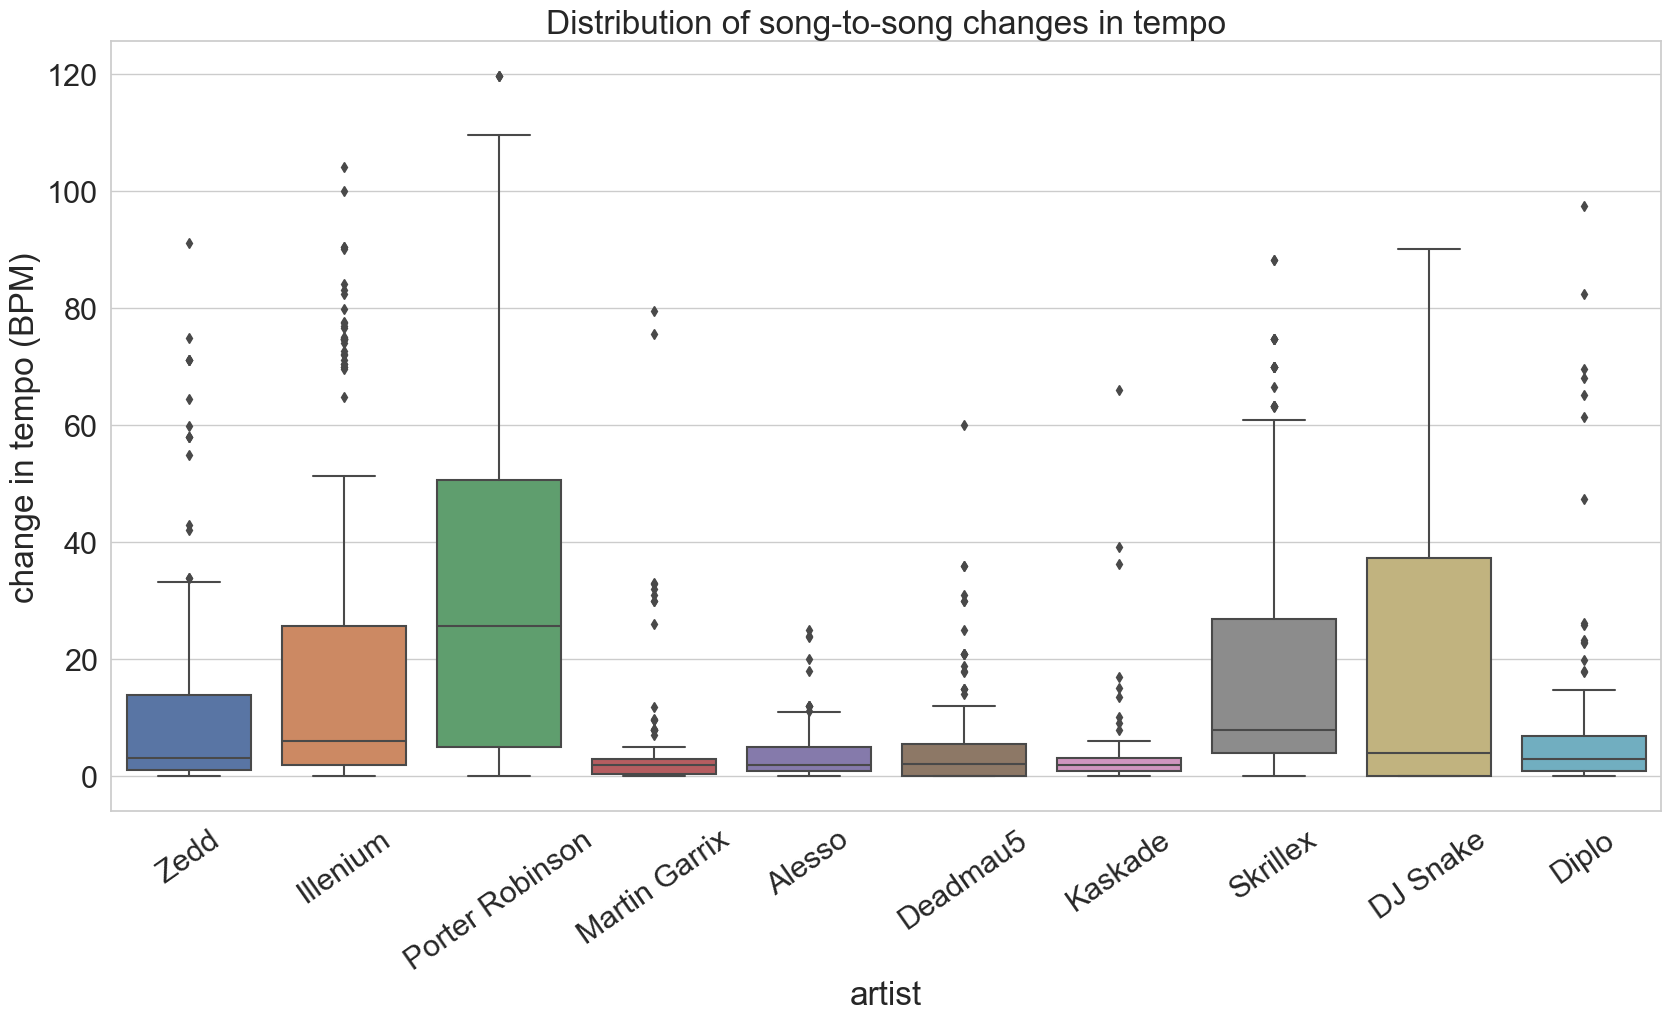

In [186]:
plt.xticks(rotation=35)
sns.set(rc={'figure.figsize':(10,20)}, font_scale = 2, style='whitegrid')
ax = sns.boxplot(x="artist", y="change in tempo", data=df_dj_avgs).set_title('Distribution of song-to-song changes in tempo')
plt.ylabel('change in tempo (BPM)')